In [1]:
import pandas as pd
input = 'https://raw.githubusercontent.com/rafaeljosem/tutoriales-mna/main/IA%20%26%20AA/data/actividad-7/SouthGermanCredit.asc'
df = pd.read_csv(input, sep=" ") #Este archivo no está separado por comas, sino con espacios en blanco. Por eso el " "
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [2]:
df_copy = df.copy() # copiamos el DF por si metemos la pata

#Fíjate que los nombres en la lista están en el mismo orden de las columnas. Por ejm, laukfont es status, laufzeit es duration, etc
translated_cols = ["status", "duration", "credit_history", "purpose", "amount", "savings", 
                   "employment_duration", "installment_rate", "personal_status_sex", 
                   "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing",
                   "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]

#Aquí decimos que sustituya los nombres de las columnas por la lista de nombres definida arriba
df_copy.columns = translated_cols

In [3]:
df_copy.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Sólo usaremos 3 variables categóricas y 3 numércias

In [4]:
cat_vars = ["status", "job", "people_liable"]
num_vars = ["age", "amount", "duration"]

In [5]:
df_copy.shape
df_copy.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_copy[cat_vars + num_vars], df_copy[["credit_risk"]], train_size=0.8)
#X train y test, Y train y Test
#train_test_split dividir el conjunto de datos en entrenamiento y prueba.
#(conjunto X, conjunto Y, tamaño entrenamiento)

In [7]:
print(Xtrain)
print(Xtest)

     status  job  people_liable  age  amount  duration
811       1    3              2   36    7297        60
499       1    3              2   35    1680        12
158       2    3              2   59    6416        48
93        1    3              2   59    1364         9
58        4    3              2   41    3160        21
..      ...  ...            ...  ...     ...       ...
916       1    3              2   20    1282        12
701       2    3              2   34    5800        36
674       2    2              2   26     625        12
965       2    3              2   26    9960        48
724       1    3              2   27    4020        24

[800 rows x 6 columns]
     status  job  people_liable  age  amount  duration
756       1    2              2   60    1199        24
810       2    3              2   23   15672        48
461       2    4              2   40    7374        18
547       3    3              2   27    1347        10
469       4    3              1   47    1

In [8]:
print(Ytrain)
print(Ytest)

     credit_risk
811            0
499            1
158            0
93             1
58             1
..           ...
916            0
701            1
674            1
965            0
724            1

[800 rows x 1 columns]
     credit_risk
756            0
810            0
461            1
547            1
469            1
..           ...
352            1
43             1
395            1
550            1
513            1

[200 rows x 1 columns]


In [9]:
#El método info te da un resumen de la estructura de tus datos. Te dice cuántas columnas ahí, cuántos datos hay, qué tipo tiene cada columna, etc.
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 811 to 724
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status         800 non-null    int64
 1   job            800 non-null    int64
 2   people_liable  800 non-null    int64
 3   age            800 non-null    int64
 4   amount         800 non-null    int64
 5   duration       800 non-null    int64
dtypes: int64(6)
memory usage: 43.8 KB


In [10]:
#El método describe de pandas te tira un resumen estadístico de cada columna numérica
Xtrain[num_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
age,800.0,35.5800,11.333873,19.0,27.0,33.0,42.00,75.0
amount,800.0,3235.0825,2795.969301,250.0,1375.5,2281.5,3907.25,18424.0
duration,800.0,20.8450,12.023797,4.0,12.0,18.0,24.00,72.0


Diagrama para age


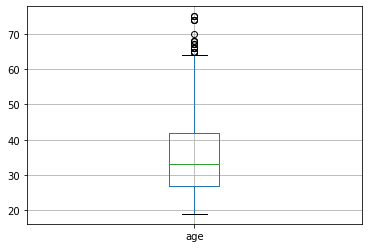



Diagrama para amount


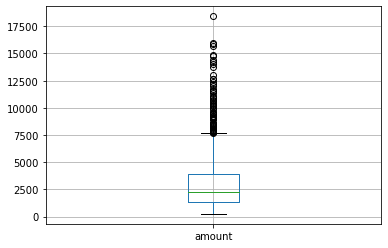



Diagrama para duration


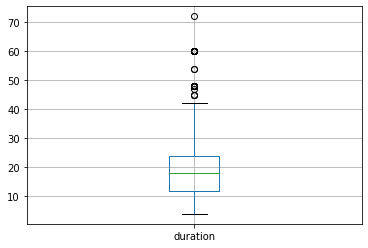

In [11]:
import matplotlib.pyplot as plt

for var in num_vars:
    print(f"Diagrama para {var}")
    Xtrain[[var]].boxplot()
    plt.show()
    print("\n")

Diagrama para age


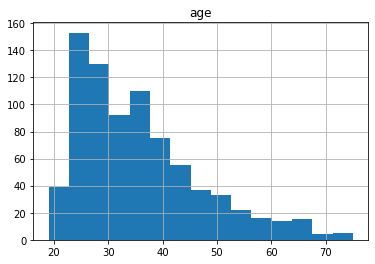



Diagrama para amount


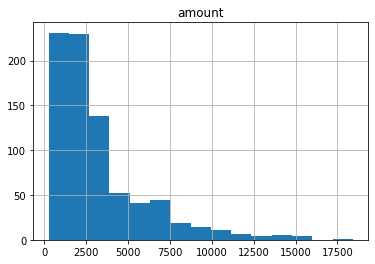



Diagrama para duration


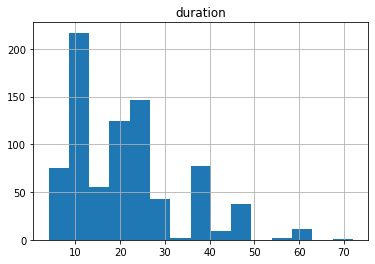

In [12]:
for var in num_vars:
    print(f"Diagrama para {var}")
    Xtrain[[var]].hist(bins=15)
    plt.show()
    print("\n")

In [13]:
#value_counts() lo que hace es contar la frecuencia de cada valor único. 
# Por ejemplo, cuantos 1s hay y cuantos 0s hay. 
# Si tuviésemos 100 números diferentes, pues haría lo mismo: cuantos 1s hay, cuantos 2s, cuantos 3s, etc.
Ytrain.value_counts()


credit_risk
1              563
0              237
dtype: int64

In [14]:
Ytrain.value_counts() / len(Ytrain) * 100

credit_risk
1              70.375
0              29.625
dtype: float64

Esto es tedioso y nos puede generar muchos problemas

In [15]:
from sklearn.impute import SimpleImputer


num_imputer = SimpleImputer(strategy='mean')
num_imputed = num_imputer.fit_transform(Xtrain[num_vars], Ytrain)

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputed = cat_imputer.fit_transform(Xtrain[cat_vars], Ytrain)

#Vamos a imprimir un ejemplo de como se ven los datos
num_imputed

array([[  36., 7297.,   60.],
       [  35., 1680.,   12.],
       [  59., 6416.,   48.],
       ...,
       [  26.,  625.,   12.],
       [  26., 9960.,   48.],
       [  27., 4020.,   24.]])

La solución es usar PipeLines

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

cat_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])

Luego usamos el Column Transformer para aplicar nuestro transformador (Pipeline) a las columnas que deseamos

In [21]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("cat", cat_pipeline, cat_vars),
    ("num", num_pipeline, num_vars)
])

Aplicamos al modelo la Regresión linearl y lo ajustamos a nuestroas variables de entrenamiento

In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np

final_pipe = Pipeline(steps = [
    ('optimus_prime', transformer),
    ('model', LogisticRegression())
])

In [24]:
final_pipe.fit(Xtrain, Ytrain.values.ravel())

Pipeline(steps=[('optimus_prime',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['status', 'job',
                                                   'people_liable']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'amount',
                                                   'duration'])])),
                ('model', LogisticRegression())])

Definir los Scores con Gmean

In [25]:
from sklearn.metrics import confusion_matrix
#La matriz de confisión nos permite evaluar los resultados de nuestro modelo

def calculate_gmean(yreal, ypred):

    #Obtenemos los valores de confusion_matrix
    results = confusion_matrix(yreal, ypred)
    #Aplanamos la matriz
    vn, fp, fn, vp = results.ravel()

    #Calculamos especificidad con la fórmula
    specificity = vn/(vn + fp)

    #Calculamos el recall
    recall = vp/(vp + fn)

    #Calculamos la media geométrica
    gmean = (specificity * recall) ** (1/2)

    #Devolvemos el valor que calculamos

    return gmean


In [26]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

def obtain_cross_validate_scores(models, model_names, X, y, cv):
    
    #Aquí almacenaremos los scores de los diferentes modelos
    scores = []
    
    #Iteramos sobre cada modelo
    for i in range(len(models)):
        
        #Construimos nuestro pipe como hicimos más arriba, usando ya el transformer que creamos
        cv_pipe = Pipeline(steps = [
        ('optimus_prime', transformer), #Nuestro transformer lo definimos arriba
        (model_names[i], models[i]) 
        ])
    
        #Hacemos la validación cruzada y almacenamos los resultados en la variable "score"
        score = cross_validate(
            estimator=cv_pipe, X=Xtrain, y=Ytrain.values.ravel(), #Evita el warning que comentamos arriba
            scoring={
                'gmean':make_scorer(calculate_gmean), 
                'accuracy':'accuracy', 
                'recall': 'recall'})
    
        #El score de cada iteración es almacenado en la lista "scores"
        scores.append(score)
    

        #Imprimos el resultado para cada modelo
        print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (model_names[i],
                                                                          np.mean(score['test_accuracy']),
                                                                          np.std(score['test_accuracy']), 
                                                                          np.mean(score['test_recall']),
                                                                          np.std(score['test_recall']),
                                                                          np.mean(score['test_gmean']),
                                                                          np.std(score['test_gmean']),  
                                                                          ))

    return scores #Devolvemos los scores por si queremos hacer algo con ellos

In [27]:
from sklearn.model_selection import learning_curve

#Esta función crea la curva de aprendizaje
def create_learning_curve(model, X, y, cv):
    
    #Otra vez el pipe. Como mejora, podríamos definir una función que nos devuelva el pipe.
    #y así no tener que repetir código. Te lo dejo de tarea.
    lc_pipe = Pipeline(steps = [
        ('optimus_prime', transformer),
        ('model', model) 
        ])
    
    #Definimos el rango del tamaño de las muestras para entrenamiento
    #Estaremos probando para tamaños de muestras que van desde un
    # 10% del total hasta el 100% del total
    sizes_perc = np.linspace(0.1,1.0,30)
    
    return learning_curve(
        estimator=lc_pipe, 
        X = X, y = y.values.ravel(), 
        train_sizes=sizes_perc, 
        cv=cv, random_state=42)


In [28]:
#Esta función grafica las curvas de aprendizaje
def plot_learning_curve(model, X, y, cv):
    
    #Antes de graficar, hay que crear la curva, verdad?
    train_sizes, train_scores, val_scores = create_learning_curve(model, X, y, cv)
    
    #Nos interesan graficar los promedios.
    train_avg = np.mean(train_scores, axis = 1)
    val_avg = np.mean(val_scores, axis = 1)
    
    plt.figure(figsize=(8,7))
    
    #.plot viene siendo una línea del gráfico. Esta línea estará
    #representando la curve de entrenamiento y será verde.
    plt.plot(train_sizes, train_avg, color = 'green', marker="o", label="Training", markersize="5" )
    
    #Esta otra línea será la curva de validación y será roja y discontinua (--)
    plt.plot(train_sizes,val_avg, color="red", marker="+", linestyle="--", markersize="5", label="Validation")
    
    #Los títulos y otras cosas.
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    
    #En este tutorial estamos graficando accuracy, pero se puede cambiar
    #La métrica en los argumentos de la función learning_curve
    plt.ylabel('Exactitud (accuracy)')

    #Le decimos que coloque la leyenda del gráfico en la esquina inferior derecha
    plt.legend(loc='lower right')
    plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = [LogisticRegression(random_state=1), DecisionTreeClassifier(random_state=1)]
model_names = ["Falcon (log)", "Jobish (tree)"] #Los nombres son arbitrarios. Llámales como gustes. Yo usé los nombres de nuestros profesores


In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Definimos la validación cruzada
cv = RepeatedStratifiedKFold (n_splits=5, n_repeats=3, random_state=42)

#Pasamos los datos a nuestra función de validación
obtain_cross_validate_scores(models, model_names, Xtrain, Ytrain, cv);

Falcon (log):
mean Accuracy: 0.726 (0.0242)
mean Recall: 0.897 (0.0388)
Gmean: 0.533 (0.0499)

Jobish (tree):
mean Accuracy: 0.674 (0.0160)
mean Recall: 0.755 (0.0262)
Gmean: 0.601 (0.0310)



Curva de aprendizaje para el modelo Falcon (log)


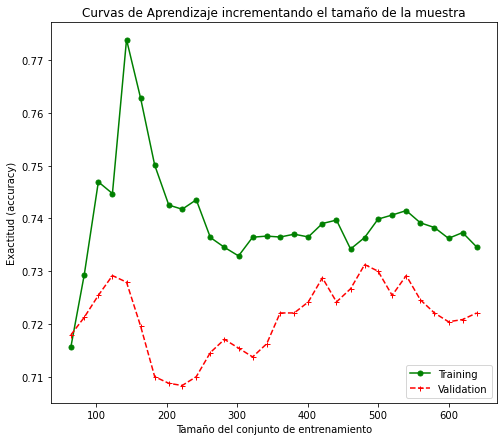

Curva de aprendizaje para el modelo Jobish (tree)


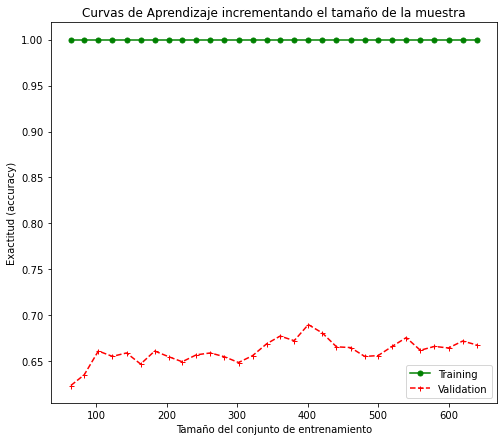

In [31]:
#Ahora vamos a usar nuestra función para graficar la cruva de aprendizaje para un modelo de regresión logística
#usando la misma validación cruzada (cv) que definimos arriba

for i in range(len(models)):
    print(f"Curva de aprendizaje para el modelo {model_names[i]}")
    plot_learning_curve (models[i], Xtrain, Ytrain, cv)

In [32]:
from sklearn.model_selection import GridSearchCV


def do_grid_search(model, X, y, cv, dicc_grid, scoring = 'accuracy'):

    #Nuestro pipe, otra vez
    grid_pipe = Pipeline(steps = [
        ('bumblebee', transformer),
        ('model', model) 
        ])
    
    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv, 
        param_grid=dicc_grid, scoring=scoring)
    
    #Le entramos los valores. Recuerda que el .ravel() es para evitar un warning
    grid.fit(X, y.values.ravel())
    
    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)

In [33]:
dicc_grid = {'model__C':np.linspace(0.0001, 100, 10),
             'model__solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

do_grid_search(models[0], Xtrain, Ytrain, cv, dicc_grid, 'accuracy')

Mejor valor de exactitud obtenido con la mejor combinación: 0.72125
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 11.1112, 'model__solver': 'newton-cg'}
Métrica utilizada: accuracy


In [34]:
dicc_grid = {'model__max_depth':np.linspace(1, 100, 10, dtype="int"),
             'model__criterion':['gini','entropy']
             }

do_grid_search(models[1], Xtrain, Ytrain, cv, dicc_grid, 'accuracy')

Mejor valor de exactitud obtenido con la mejor combinación: 0.7037500000000001
Mejor combinación de valores encontrados de los hiperparámetros: {'model__criterion': 'gini', 'model__max_depth': 1}
Métrica utilizada: accuracy
